In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import random
from __future__ import unicode_literals,print_function, division
from io import open
import glob
import os

In [ ]:
# unziping the datafiles
!unzip data.zip

Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/eng-fra.txt        
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


three main types of I/O : 
1. text 
2. binary 
3. raw.
*unicode : a common platform to represent ascii and other languages using some keywords.
*



In [ ]:
#Restucture the dataset

def findFiles(path):
  return glob.glob(path)  # to return the files of the patterns of the path defined

print(findFiles('data/names/*.txt')) 

import unicodedata
import string

all_letters = string.ascii_letters+ ".,;'"  #it will return all lower & uppercase characters
n_letters =len(all_letters)
print(f"the number of letters are {n_letters}")

#Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
  return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('ALok'))


category_lines= {}
all_categories=[]

"""Read a file and split into lines

# def readLines(filename):
#   lines= open(filename, encoding='utf-8').read().strip().split('\n') 
#   for line in lines:
#     line=unicodeToAscii(line)
#     lines.append(line)
#     return lines """

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n') #gives a list of all names in the text file
    return [unicodeToAscii(line) for line in lines]



['data/names/Spanish.txt', 'data/names/Portuguese.txt', 'data/names/Czech.txt', 'data/names/Dutch.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Chinese.txt', 'data/names/German.txt', 'data/names/Italian.txt', 'data/names/Arabic.txt', 'data/names/Greek.txt', 'data/names/Korean.txt', 'data/names/English.txt', 'data/names/Scottish.txt', 'data/names/Vietnamese.txt', 'data/names/Polish.txt', 'data/names/Irish.txt', 'data/names/Japanese.txt']
the number of letters are 56
ALok


In [ ]:
#To understand whats happenig inside the readLines() function
lines= open('data/names/Spanish.txt', encoding='utf-8').read().split('\n')
print(lines)
print(unicodeToAscii(lines[0]))

['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal', 'Abasolo', 'Abel', 'Abelló', 'Aberquero', 'Abreu', 'Acosta', 'Agramunt', 'Aiza', 'Alamilla', 'Albert', 'Albuquerque', 'Aldana', 'Alfaro', 'Alvarado', 'Álvarez', 'Alves', 'Amador', 'Andreu', 'Antúnez', 'Aqua', 'Aquino', 'Araújo', 'Araullo', 'Araya', 'Arce', 'Arechavaleta', 'Arena', 'Aritza', 'Armando', 'Arreola', 'Arriola', 'Asis', 'Asturias', 'Avana', 'Azarola', 'Banderas', 'Barros', 'Basurto', 'Bautista', 'Bello', 'Belmonte', 'Bengochea', 'Benitez', 'Bermúdez', 'Blanco', 'Blanxart', 'Bolívar', 'Bonaventura', 'Bosque', 'Bustillo', 'Busto', 'Bustos', 'Cabello', 'Cabrera', 'Campo', 'Campos', 'Capello', 'Cardona', 'Caro', 'Casales', 'Castell', 'Castellano', 'Castillion', 'Castillo', 'Castro', 'Chavarría', 'Chavez', 'Colón', 'Costa', 'Crespo', 'Cruz', 'Cuéllar', 'Cuevas', "D'cruz", "D'cruze", 'De la cruz', 'De la fuente', 'Del bosque', 'De leon', 'Delgado', 'Del olmo', 'De santigo', 'Díaz', 'Dominguez', 'Duarte', 'Durante', 'Echevarría', 'E

The letters of the word can be represented by one-hot-vector of 1*n 
n: no of letters.

A full word is nothing but than the representation of those letters in one hot encoded 2D matrix

In [ ]:
#Create a list of categories
for filename in findFiles('data/names/*.txt'):
  category= os.path.splitext(os.path.basename(filename))[0] #take the name of txt file from path split it and take the first letter as category
  all_categories.append(category) 
  lines=readLines(filename)
  category_lines[category]=lines
  n_categories= len(all_categories)

#to let us know whats happening we will print few variables

print(f"the list all_categories is : {all_categories}")
print(f"the total length of the list all_catergories is {n_categories}")

print(f"the category_lines are : {category_lines}")
print(lines)


the list all_categories is : ['Spanish', 'Portuguese', 'Czech', 'Dutch', 'Russian', 'French', 'Chinese', 'German', 'Italian', 'Arabic', 'Greek', 'Korean', 'English', 'Scottish', 'Vietnamese', 'Polish', 'Irish', 'Japanese']
the total length of the list all_catergories is 18
the category_lines are : {'Spanish': ['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal', 'Abasolo', 'Abel', 'Abello', 'Aberquero', 'Abreu', 'Acosta', 'Agramunt', 'Aiza', 'Alamilla', 'Albert', 'Albuquerque', 'Aldana', 'Alfaro', 'Alvarado', 'Alvarez', 'Alves', 'Amador', 'Andreu', 'Antunez', 'Aqua', 'Aquino', 'Araujo', 'Araullo', 'Araya', 'Arce', 'Arechavaleta', 'Arena', 'Aritza', 'Armando', 'Arreola', 'Arriola', 'Asis', 'Asturias', 'Avana', 'Azarola', 'Banderas', 'Barros', 'Basurto', 'Bautista', 'Bello', 'Belmonte', 'Bengochea', 'Benitez', 'Bermudez', 'Blanco', 'Blanxart', 'Bolivar', 'Bonaventura', 'Bosque', 'Bustillo', 'Busto', 'Bustos', 'Cabello', 'Cabrera', 'Campo', 'Campos', 'Capello', 'Cardona', 'Caro', 'Casales', '

In [ ]:

#Assign indexes to the letters of the word
def letterToIndex(letter):
  index= all_letters.find(letter)
  return index

#Convert a letter into a tensor of 1*n dimension
def letterToTensor(letter):
  tensor=torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)]=1
  return tensor

#Converting a line into a (line_length, 1, n_letters)
def lineToTensor(line):
  tensor= torch.zeros(len(line),1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)]=1
  return tensor



In [ ]:
print(letterToTensor('A'))
print(lineToTensor('Alok').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
torch.Size([4, 1, 56])


In [ ]:
#from output tensor it will take the top 1st value of outputs and return corresponding cateogory list
def categoryFromOutput(output):
  top_n, top_i=output.topk(1) #top_n: value of top no , top_i=indices of top no
  category_i=top_i[0].item()
  return all_categories[category_i], category_i

In [ ]:
#To understand whats happening in CateogoryFromOutput()
output=torch.tensor([1,2,5,6,9,0])
top_n, top_i=output.topk(1) #top_n: value of top no , top_i=indices of top no
category_i =top_i[0].item()
print(top_i[0].item())
print(top_n, top_i)
print(category_i)
all_categories[category_i], category_i

4
tensor([9]) tensor([4])
4


('Russian', 4)

#Creating the Model
Model reference: from class code of dl-ops
![image.png](
  





)








ssv vs 





In [ ]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size

    self.i2h= nn.Linear(input_size + hidden_size, hidden_size)
    self.i20 = nn.Linear(input_size + hidden_size, output_size)
    self.softmax=nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined=torch.cat((input, hidden), 1)
    hidden= self.i2h(combined)
    output=self.i20(combined)
    output=self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)




In [ ]:
def randomChoice(l):  #it will take any random no from given lenth of list
  return random.randint(0,len(l)-1)

def randomTrainingExample(X = X_train, y = y_train):
  index=randomChoice(y)
  line = X[index]
  category = y[index]
  #line= randomChoice(category_lines[category])
  category_tensor=torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor=lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
   category, line, category_tensor, line_tensor= randomTrainingExample(X_train, y_train)
   print('category=', category,'/line=', line)



category= Russian /line= Handjyan
category= Russian /line= Valishin
category= English /line= Brooke
category= Russian /line= Livanov
category= Russian /line= Andrusiv
category= Japanese /line= Katayama
category= Russian /line= Zhelyabov
category= English /line= Clough
category= English /line= Gilder
category= Russian /line= Hazeev


In [ ]:
def make_dataset():
  dataset = []
  X = []
  y = []
  for cat in all_categories:
    #catTensor = letterToTensor(cat)
    for line in category_lines[cat]:
      #lineTensor = letterToTensor(line)
      #dataset.append([catTensor, lineTensor])
      X.append(line)
      y.append(cat)
  return X, y
X, y = make_dataset()

#print(dataset[0][1])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,shuffle=True, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5,shuffle=True, random_state=42)



In [ ]:
# #To understand whats happening in the randomTrainingExample():
# category=randomChoice(all_categories)
# print(category)
# line= category_lines[category](randomChoice(category_lines[category]))
# print(line)
# category_tensor=torch.tensor([all_categories.index(category)], dtype=torch.long)
# print(category_tensor, category_tensor.shape)
# line_tensor=lineToTensor(line)
# print(line_tensor,line_tensor.shape)

In [ ]:
def train_model(model,optimizer):
  n_iters=100000
  print_every=5000
  plot_every=1000
  current_loss=0
  all_losses=[]
  for iter in range(1, n_iters + 1):
      category, line, category_tensor, line_tensor = randomTrainingExample(X_train, y_train)
      hidden = model.initHidden()
      line_tensor = line_tensor
      hidden = hidden
      model.zero_grad()
      
      for i in range(line_tensor.size()[0]):
          output, hidden = model(line_tensor[i], hidden)

      loss = criterion(output, category_tensor)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Add parameters' gradients to their values, multiplied by learning rate
      # for p in rnn.parameters():
      #     p.data.add_(p.grad.data, alpha=-learning_rate)

      loss=loss.item()
      current_loss += loss

      # Print iter number, loss, name and guess
      if iter % print_every == 0:
          guess, guess_i = categoryFromOutput(output)

          print(guess, guess_i, category)
          correct = '✓' if guess == category else '✗ (%s)' % category
          print('%d %d%% %.4f %s / %s %s' % (iter, iter / n_iters * 100, loss,line, guess, correct))

      # Add current loss avg to list of losses
      if iter % plot_every ==0 :
          all_losses.append(current_loss / plot_every)
          current_loss = 0

model_0 with hyperparameters as 
(lr, opimizer, n_hidden)=(0.001, SGD, 128)

In [ ]:
n_hidden=128
model_0=RNN(n_letters, n_hidden, n_categories)
criterion= nn.NLLLoss()
lr=0.001
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_model(model=model_0, optimizer=optimizer)

Japanese 17 German
5000 5% 2.8137 Nagel / Japanese ✗ (German)
Greek 10 German
10000 10% 2.9007 Krause / Greek ✗ (German)
Japanese 17 English
15000 15% 2.8913 Keenan / Japanese ✗ (English)
Greek 10 Japanese
20000 20% 2.8743 Aoki / Greek ✗ (Japanese)
German 7 Italian
25000 25% 2.8548 Negrini / German ✗ (Italian)
Japanese 17 Russian
30000 30% 2.8351 Liventsev / Japanese ✗ (Russian)
Japanese 17 Russian
35000 35% 2.8308 Tuboltsev / Japanese ✗ (Russian)
Japanese 17 Russian
40000 40% 2.8756 Danin / Japanese ✗ (Russian)
Greek 10 Russian
45000 45% 2.8251 Tseboev / Greek ✗ (Russian)
Japanese 17 English
50000 50% 2.9307 Doon / Japanese ✗ (English)
Japanese 17 English
55000 55% 2.9411 Austen / Japanese ✗ (English)
Japanese 17 English
60000 60% 2.9520 Seddon / Japanese ✗ (English)
Dutch 3 Russian
65000 65% 2.8833 Lykoshin / Dutch ✗ (Russian)
Czech 2 English
70000 70% 2.9308 Roussel / Czech ✗ (English)
Russian 4 English
75000 75% 2.9396 Geary / Russian ✗ (English)
Greek 10 French
80000 80% 2.9777 La

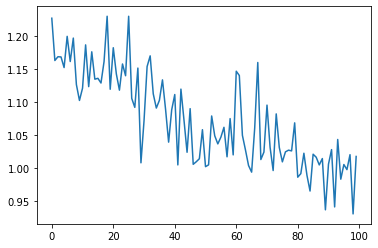

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)

#Evaluating the model on test set and plotting the function
plot function ref :https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

In [ ]:
def test_and_plot(model):
  # Keep track of correct guesses in a confusion matrix
  confusion = torch.zeros(n_categories, n_categories)
  n_confusion = 10000

  # Just return an output given a line
  def evaluate(line_tensor):
      hidden = model.initHidden()
      for i in range(line_tensor.size()[0]):
          output, hidden = model(line_tensor[i], hidden)

      return output

  # Go through a bunch of examples and record which are correctly guessed
  for i in range(n_confusion):
      category, line, category_tensor, line_tensor = randomTrainingExample(X_test,y_test)
      output = evaluate(line_tensor)
      guess, guess_i = categoryFromOutput(output)
      category_i = all_categories.index(category)
      confusion[category_i][guess_i] += 1

  # Normalize by dividing every row by its sum
  for i in range(n_categories):
      confusion[i] = confusion[i] / confusion[i].sum()

  # Set up plot
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(confusion.numpy())
  fig.colorbar(cax)

  # Set up axes
  ax.set_xticklabels([''] + all_categories, rotation=90)
  ax.set_yticklabels([''] + all_categories)

  # Force label at every tick
  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  # sphinx_gallery_thumbnail_number = 2
  plt.show()

<ipython-input-193-6d5a80ec893d>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-193-6d5a80ec893d>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


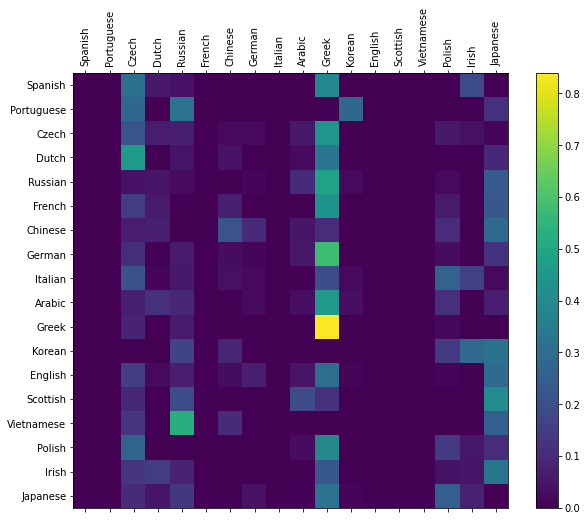

In [ ]:
test_and_plot(model=model_0)

model_1 with hyperparameters 
(lr, opimizer, n_hidden)=(0.005, ADAM, 256)

In [ ]:
n_hidden=256
model_1=RNN(n_letters, n_hidden, n_categories)
criterion= nn.NLLLoss()
lr=0.005
optimizer=torch.optim.Adam(model.parameters(),betas=(0.9,0.999),lr=lr)
train_model(model=model_1, optimizer=optimizer)

Chinese 6 English
5000 5% 2.8326 Mcavoy / Chinese ✗ (English)
English 12 Japanese
10000 10% 2.9106 Shigi / English ✗ (Japanese)
English 12 Italian
15000 15% 2.9368 Armati / English ✗ (Italian)
Chinese 6 Arabic
20000 20% 2.9611 Morcos / Chinese ✗ (Arabic)
English 12 Russian
25000 25% 2.8129 Galerkin / English ✗ (Russian)
Spanish 0 Russian
30000 30% 2.9340 Minenko / Spanish ✗ (Russian)
Portuguese 1 Russian
35000 35% 2.8763 Jatzunov / Portuguese ✗ (Russian)
Japanese 17 Chinese
40000 40% 2.8968 She / Japanese ✗ (Chinese)
Chinese 6 Portuguese
45000 45% 2.8221 Soares / Chinese ✗ (Portuguese)
English 12 Czech
50000 50% 2.8316 Blober / English ✗ (Czech)
English 12 Russian
55000 55% 2.9456 Abduloff / English ✗ (Russian)
English 12 English
60000 60% 2.7587 Kitching / English ✓
Portuguese 1 Russian
65000 65% 2.8718 Asylmuratov / Portuguese ✗ (Russian)
English 12 Russian
70000 70% 2.8301 Morehin / English ✗ (Russian)
English 12 Russian
75000 75% 2.8483 Hamchiev / English ✗ (Russian)
Russian 4 Engl

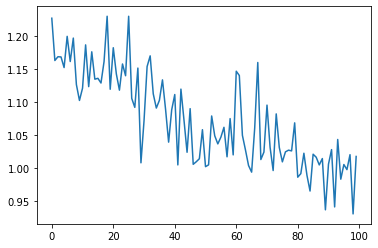

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)

<ipython-input-209-6d5a80ec893d>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-209-6d5a80ec893d>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


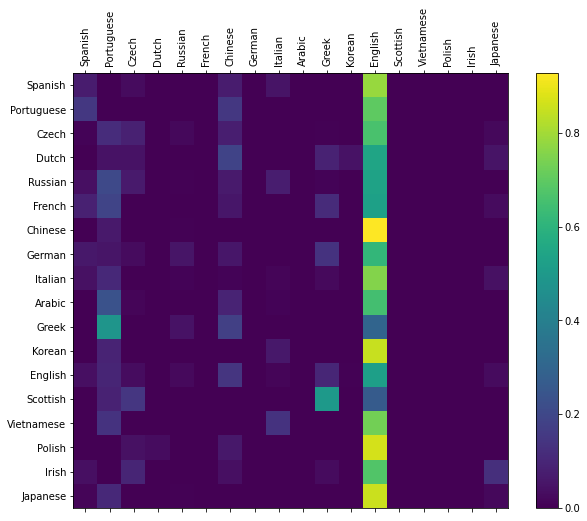

In [ ]:
test_and_plot(model=model_1)

#Creating the model with 3 layers

In [ ]:
class RNNModel_3_Layer(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNNModel_3_Layer, self).__init__()
    self.hidden_size = hidden_size

    self.i2h= nn.Linear(input_size + hidden_size, hidden_size)
    self.i20_1 = nn.Linear(input_size + hidden_size, hidden_size)
    self.relu1=nn.ReLU()

    self.i20_2 = nn.Linear(hidden_size, hidden_size)
    self.relu2=nn.ReLU()

    self.i20_3 = nn.Linear(hidden_size, hidden_size)
    self.relu3=nn.ReLU()

    self.i20_4 = nn.Linear(hidden_size, output_size)
    self.softmax=nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    
    #print(f"the shape of input is {input.shape}")
    #print(f"the shape of hidden is {hidden.shape}")
    combined=torch.cat((input, hidden), 1)

    hidden= self.i2h(combined)
    #print(f"the shape of i/p and hidden combined after hidden is {combined.shape}")
    output=self.i20_1(combined)
    #print(f"the shape of out put of layer 1 is {output.shape}")
    output=self.relu1(output)
    #print(f"the shape of out put of layer 1 after relu is {output.shape}")

    output=self.i20_2(output)
    output=self.relu2(output)

    output= self.i20_3(output)
    output=self.relu3(output)
    
    output=self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)




In [ ]:
n_hidden=128
model_3lyr = RNNModel_3_Layer(n_letters, n_hidden, n_categories)
criterion= nn.NLLLoss()
lr=0.001
optimizer=torch.optim.Adam(model_3lyr.parameters(),betas=(0.9,0.999),lr=lr)
train_model(model=model_3lyr, optimizer=optimizer)

Russian 4 Russian
5000 5% 0.0146 Awdoshin / Russian ✓
Russian 4 Arabic
10000 10% 6.9799 Ganim / Russian ✗ (Arabic)
English 12 Japanese
15000 15% 5.0294 Karube / English ✗ (Japanese)
English 12 Korean
20000 20% 5.8644 Sook / English ✗ (Korean)
English 12 English
25000 25% 0.6721 Opayne / English ✓
Russian 4 Polish
30000 30% 4.9169 Stawski / Russian ✗ (Polish)
Russian 4 Russian
35000 35% 0.0000 Yablochkov / Russian ✓
Russian 4 Italian
40000 40% 4.9016 Mondo / Russian ✗ (Italian)
English 12 English
45000 45% 0.3238 Kettell / English ✓
Russian 4 Russian
50000 50% 0.0034 Baheloff / Russian ✓
Russian 4 Russian
55000 55% 0.4304 Bahir / Russian ✓
English 12 English
60000 60% 0.3145 Aslam / English ✓
English 12 English
65000 65% 1.7428 Squire / English ✓
Russian 4 Russian
70000 70% 0.3014 Harik / Russian ✓
Arabic 9 Arabic
75000 75% 0.3536 Antoun / Arabic ✓
Arabic 9 Arabic
80000 80% 1.7773 Maroun / Arabic ✓
English 12 English
85000 85% 0.1405 Telford / English ✓
English 12 English
90000 90% 0.22

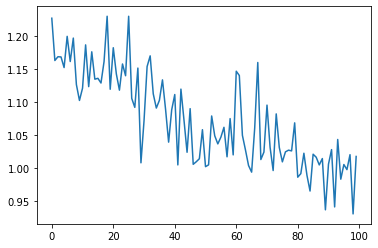

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)

<ipython-input-209-6d5a80ec893d>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-209-6d5a80ec893d>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


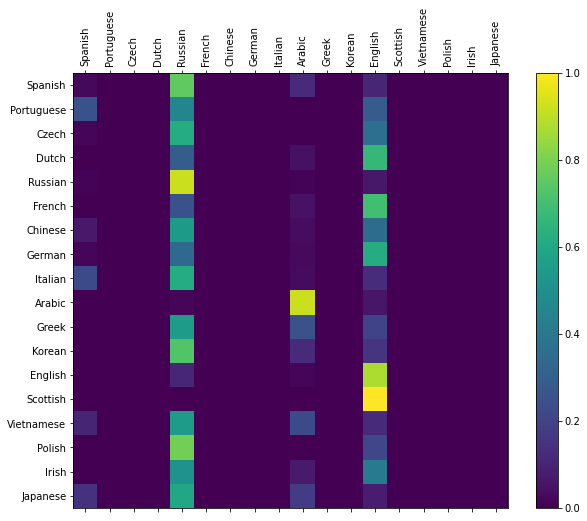

In [ ]:
test_and_plot(model=model_3lyr)